In [49]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib
from neo.io import AxonIO
#import seaborn as sns
import matplotlib.pyplot as plt
import itertools

import numpy as np
import pandas as pd

#import altair as alt
# import the data
#flydir = '/Volumes/hm_data/MN optogenetic activation/b1/1218 fly 3/'


In [50]:
flydir = '/home/alysha/analysis_files/S103/S103/' #B2_full_df/'



In [73]:
#f1 = pd.read_csv(flydir + 's81_b2_df_fly_01.csv')
#f2 = pd.read_csv(flydir + 's81_b2_df_fly_02.csv')
#f3 = pd.read_csv(flydir + 's81_b2_df_fly_03.csv')
#f4 = pd.read_csv(flydir + 's81_b2_df_fly_04.csv')
#f5 = pd.read_csv(flydir + 's81_b2_df_fly_05.csv')
#f6 = pd.read_csv(flydir + 's81_b2_df_fly_06.csv')



f1 = pd.read_csv(flydir + 's103_b1_phase_df_fly_01.csv')
f2 = pd.read_csv(flydir + 's103_b1_phase_df_fly_02.csv')
f3 = pd.read_csv(flydir + 's103_b1_phase_df_fly_03.csv')
f4 = pd.read_csv(flydir + 's103_b1_phase_df_fly_04.csv')
f5 = pd.read_csv(flydir + 's103_b1_phase_df_fly_05.csv')
f6 = pd.read_csv(flydir + 's103_b1_phase_df_fly_06.csv')
#f7 = pd.read_csv(flydir + 's104_b2_df_fly_07.csv')
#f8 = pd.read_csv(flydir + 's104_i1_df_fly_08.csv')
#f9 = pd.read_csv(flydir + 's104_i1_df_fly_09.csv')
#f10 = pd.read_csv(flydir + 's81_b2_df_fly_06.csv')

In [74]:
df = pd.concat([f1, f2, f3, f4, f5, f6])#, f7])#, f8, f8])
#df = pd.concat([f2, f3, f4])
df.head()

,fly01_b1_phase_df1,fly01_b1_phase_df10,fly01_b1_phase_df2,fly01_b1_phase_df3,fly01_b1_phase_df4,fly01_b1_phase_df5,fly01_b1_phase_df6,fly01_b1_phase_df7,fly01_b1_phase_df8,fly01_b1_phase_df9,...,fly_02_b1_mean_phase,fly_02_b1_phase_error,fly_03_b1_mean_phase,fly_03_b1_phase_error,fly_04_b1_mean_phase,fly_04_b1_phase_error,fly_05_b1_mean_phase,fly_05_b1_phase_error,fly_06_b1_mean_phase,fly_06_b1_phase_error
0,0.299954,-0.735226,0.008066,0.218026,-0.333783,-0.275644,-0.974565,-0.167885,0.153836,-1.880316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.813760,-0.011403,-0.585078,0.749795,-0.035184,-0.407569,-1.051726,-0.096043,0.251281,-1.443559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.310677,0.861011,-1.061641,1.217653,0.193011,-0.546447,-1.066640,-0.069896,0.187407,-0.846563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.734480,1.738372,-1.358102,1.569152,0.331629,-0.638901,-1.048164,-0.087549,0.006153,-0.231814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.025618,2.465556,-1.439836,1.771278,0.372958,-0.645213,-1.030984,-0.139261,-0.221382,0.262460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df.columns

Index([u'fly01_b1_phase_df1', u'fly01_b1_phase_df10', u'fly01_b1_phase_df2',
       u'fly01_b1_phase_df3', u'fly01_b1_phase_df4', u'fly01_b1_phase_df5',
       u'fly01_b1_phase_df6', u'fly01_b1_phase_df7', u'fly01_b1_phase_df8',
       u'fly01_b1_phase_df9',
       ...
       u'fly_02_b1_mean_phase', u'fly_02_b1_phase_error',
       u'fly_03_b1_mean_phase', u'fly_03_b1_phase_error',
       u'fly_04_b1_mean_phase', u'fly_04_b1_phase_error',
       u'fly_05_b1_mean_phase', u'fly_05_b1_phase_error',
       u'fly_06_b1_mean_phase', u'fly_06_b1_phase_error'],
      dtype='object', length=162)

In [72]:
'''f1 = df['fly_01_b1_mean_phase']
f2 =df['fly_02_b1_mean_phase']
f3 =df['fly_03_b1_mean_phase']
f4 =df['fly_04_b1_mean_phase']
f5 =df['fly_05_b1_mean_phase']
f6 =df['fly_06_b1_mean_phase']
#df['fly_02_b1_mean_phase']
'''

"f1 = df['fly_01_b1_mean_phase']\nf2 =df['fly_02_b1_mean_phase']\nf3 =df['fly_03_b1_mean_phase']\nf4 =df['fly_04_b1_mean_phase']\nf5 =df['fly_05_b1_mean_phase']\nf6 =df['fly_06_b1_mean_phase']\n#df['fly_02_b1_mean_phase']\n"

In [13]:
#df = f1.append([f2, f3, f4, f5, f6])

In [40]:
df.to_csv('b1_phase_df.csv', index=False)

In [59]:
#df['fly01_crimson7']

In [68]:
df

,fly01_b1_phase_df1,fly01_b1_phase_df10,fly01_b1_phase_df2,fly01_b1_phase_df3,fly01_b1_phase_df4,fly01_b1_phase_df5,fly01_b1_phase_df6,fly01_b1_phase_df7,fly01_b1_phase_df8,fly01_b1_phase_df9,...,fly_02_b1_mean_phase,fly_02_b1_phase_error,fly_03_b1_mean_phase,fly_03_b1_phase_error,fly_04_b1_mean_phase,fly_04_b1_phase_error,fly_05_b1_mean_phase,fly_05_b1_phase_error,fly_06_b1_mean_phase,fly_06_b1_phase_error
0,0.299954,-0.735226,0.008066,0.218026,-0.333783,-0.275644,-0.974565,-0.167885,0.153836,-1.880316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.813760,-0.011403,-0.585078,0.749795,-0.035184,-0.407569,-1.051726,-0.096043,0.251281,-1.443559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.310677,0.861011,-1.061641,1.217653,0.193011,-0.546447,-1.066640,-0.069896,0.187407,-0.846563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.734480,1.738372,-1.358102,1.569152,0.331629,-0.638901,-1.048164,-0.087549,0.006153,-0.231814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.025618,2.465556,-1.439836,1.771278,0.372958,-0.645213,-1.030984,-0.139261,-0.221382,0.262460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.131987,2.908946,-1.306571,1.812923,0.320888,-0.551005,-1.044878,-0.210116,-0.417871,0.539541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.019295,2.985547,-0.992073,1.703713,0.189504,-0.372061,-1.104836,-0.283448,-0.520864,0.569599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.678635,2.681325,-0.558096,1.469800,0.000445,-0.150854,-1.204660,-0.344280,-0.498669,0.396199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.129613,2.054335,-0.083599,1.147654,-0.220478,0.054405,-1.315910,-0.382073,-0.357148,0.122204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.418425,1.221823,0.348900,0.777230,-0.446832,0.185349,-1.392836,-0.392282,-0.135995,-0.120879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
f1 = f2

In [12]:
f1.head()

,fly01_b1_phase_df1,fly01_b1_phase_df10,fly01_b1_phase_df2,fly01_b1_phase_df3,fly01_b1_phase_df4,fly01_b1_phase_df5,fly01_b1_phase_df6,fly01_b1_phase_df7,fly01_b1_phase_df8,fly01_b1_phase_df9,...,fly01_times2,fly01_times3,fly01_times4,fly01_times5,fly01_times6,fly01_times7,fly01_times8,fly01_times9,fly_02_b1_mean_phase,fly_02_b1_phase_error
0,-0.248857,-2.980425,-1.466200,-0.262924,-0.570413,-1.923372,2.510878,1.859991,-0.122107,0.693643,...,0.296250,0.379600,0.479000,0.564150,0.638500,0.699300,0.815400,0.918500,-0.250979,0.525132
1,-0.151223,-4.697134,-0.999875,-1.092831,-0.425087,-1.998659,1.000034,3.217271,-0.792706,0.412553,...,0.270835,0.353886,0.457652,0.547303,0.614075,0.668449,0.795276,0.898588,-0.552766,0.645921
2,-0.333435,-3.827326,-0.719943,-1.194446,-0.082539,-1.383669,-1.208589,3.036800,-1.082185,0.513930,...,0.280494,0.364089,0.461196,0.546428,0.622034,0.690645,0.797395,0.900477,-0.628140,0.545675
3,-0.718986,-0.493089,-0.758526,-0.664379,0.113741,-0.363086,-2.156408,0.911864,-0.745073,0.981640,...,0.301352,0.385268,0.476896,0.555899,0.641752,0.714491,0.811395,0.914182,-0.389230,0.286879
4,-1.005388,2.612137,-0.828190,-0.318597,0.045044,0.606245,-0.967021,-1.679084,-0.115390,1.499605,...,0.310280,0.393737,0.489298,0.567386,0.651989,0.709766,0.823962,0.926743,-0.015064,0.408321


In [ ]:
# Tidy the DataFrame
#df_gt = pd.melt(df_gt, var_name='genotype', value_name='location')

In [69]:
new_f1 = df

In [70]:
#chrimson_columns = new_f1['crimson1', 'crimson2', 'crimson3', 'crimson4', 'crimson5', 'crimson6',
#                          'crimson7', 'crimson8', 'crimson9', 'crimson10', 'crimson11', 'crimson12']
                         
                         
chrimson_columns = new_f1[['crimson1', 'crimson2', 'crimson3', 'crimson4', 'crimson5', 'crimson6',
                          'crimson7', 'crimson8', 'crimson9', 'crimson10']]
#new_f1[['crimson1', 'crimson2', ]].head()
chrimson_columns.head()

KeyError: "['crimson1' 'crimson2' 'crimson3' 'crimson4' 'crimson5' 'crimson6'\n 'crimson7' 'crimson8' 'crimson9' 'crimson10'] not in index"

In [65]:
chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
chrimson_columns.head()

crimson1   NaN
crimson2   NaN
crimson3   NaN
crimson4   NaN
crimson5   NaN
Name: fly_02_b1_mean_phase, dtype: float64

In [56]:
chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
chrimson_tidy.head()

,trial,chrimson_power
0,1,1.997986
1,1,1.842935
2,1,1.420617
3,1,0.845925
4,1,0.268220


In [62]:
len(chrimson_tidy['trial'])
chrimson_tidy['fly'] = 1
chrimson_tidy['muscle'] = 'b2'
chrimson_tidy.head()

,trial,chrimson_power,fly,muscle
0,1,1.997986,1,b2
1,1,1.842935,1,b2
2,1,1.420617,1,b2
3,1,0.845925,1,b2
4,1,0.268220,1,b2


In [60]:
times_columns = new_f1[['times1', 'times2', 'times3', 'times4', 'times5', 'times6',
                          'times7', 'times8', 'times9', 'times10']]
#new_f1[['crimson1', 'crimson2', ]].head()
times_columns.head()


times1   NaN
times2   NaN
times3   NaN
times4   NaN
times5   NaN
Name: fly_01_b1_mean_phase, dtype: float64

In [61]:
times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
times_columns.head()

times1   NaN
times2   NaN
times3   NaN
times4   NaN
times5   NaN
Name: fly_01_b1_mean_phase, dtype: float64

In [62]:
times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
times_tidy.head()

ValueError: need more than 1 value to unpack

In [48]:
chrimson_tidy['times(sec)']=times_tidy['times(sec)']
chrimson_tidy.head()

,trial,chrimson_power,fly,muscle,times(sec),inds
0,1,0.009766,1,b2,0.024850,0
1,1,0.009778,1,b2,0.017238,1
2,1,0.009755,1,b2,0.013582,2
3,1,0.009699,1,b2,0.013509,3
4,1,0.009622,1,b2,0.016153,4


In [71]:
columns =new_f1.columns
columns

Index([u'crimson1', u'crimson10', u'crimson2', u'crimson3', u'crimson4',
       u'crimson5', u'crimson6', u'crimson7', u'crimson8', u'crimson9',
       u'fly01_b2_df1', u'fly01_b2_df10', u'fly01_b2_df2', u'fly01_b2_df3',
       u'fly01_b2_df4', u'fly01_b2_df5', u'fly01_b2_df6', u'fly01_b2_df7',
       u'fly01_b2_df8', u'fly01_b2_df9', u'fly_01_b2_freq_error',
       u'fly_01_b2_mean_freq_change', u'fly_01_b2_mean_freq_change_series',
       u'times1', u'times10', u'times2', u'times3', u'times4', u'times5',
       u'times6', u'times7', u'times8', u'times9'],
      dtype='object')

In [75]:
muscle_activity_columns = new_f1[['fly01_b2_df1', 'fly01_b2_df2', 'fly01_b2_df3', 'fly01_b2_df4', 'fly01_b2_df5', 'fly01_b2_df6',
                          'fly01_b2_df7', 'fly01_b2_df8', 'fly01_b2_df9', 'fly01_b2_df10']]
#new_f1[['crimson1', 'crimson2', ]].head()
muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
#muscle_activity_columns.head()
muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
muscle_activity_tidy.head()

,trial,muscle_activity
0,1,4.825988e-13
1,1,-3.985807e+00
2,1,-5.049769e+00
3,1,-3.812141e+00
4,1,-1.384995e+00


In [76]:
chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
chrimson_tidy.head()

,trial,chrimson_power,fly,muscle,times(sec),muscle_activity
0,1,1.997986,1,b2,2.814452,4.825988e-13
1,1,1.842935,1,b2,1.592264,-3.985807e+00
2,1,1.420617,1,b2,1.265707,-5.049769e+00
3,1,0.845925,1,b2,1.645055,-3.812141e+00
4,1,0.268220,1,b2,2.389538,-1.384995e+00


In [ ]:
#fly_01_b2_mean_freq_change' 
#'fly_01_b2_mean_freq_change_series'
#calculate separately

In [77]:
fly_1_tidy = chrimson_tidy

In [45]:
inds = chrimson_tidy.index.values
chrimson_tidy['inds'] = chrimson_tidy.index.values
chrimson_tidy.head()

,trial,chrimson_power,fly,muscle,times(sec),inds
0,1,0.009766,1,b2,0.024850,0
1,1,0.009778,1,b2,0.017238,1
2,1,0.009755,1,b2,0.013582,2
3,1,0.009699,1,b2,0.013509,3
4,1,0.009622,1,b2,0.016153,4


In [75]:
#fly_list = f1, f2, f3, f4, f5, f6
fly_list = f1, f2, f3, f4, f5, f6#, f7#, f8, f9#, f10
trial = np.arange(1,12)

In [82]:
for f in range(len(fly_list)): 
    new_f = fly_list[f]
    
    if  f == 0:
        chrimson_columns = new_f[['fly01_crimson1', 'fly01_crimson2', 'fly01_crimson3', 'fly01_crimson4', 'fly01_crimson5', 'fly01_crimson6',
                              'fly01_crimson7', 'fly01_crimson8', 'fly01_crimson9', 'fly01_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly01_times1', 'fly01_times2', 'fly01_times3', 'fly01_times4', 'fly01_times5', 'fly01_times6',
                              'fly01_times7', 'fly01_times8', 'fly01_times9', 'fly01_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly01_b2_df1', 'fly01_b2_df2', 'fly01_b2_df3', 'fly01_b2_df4', 'fly01_b2_df5', 'fly01_b2_df6',
                              'fly01_b2_df7', 'fly01_b2_df8', 'fly01_b2_df9', 'fly01_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_1 = chrimson_tidy

        
    
    if  f == 1:
        chrimson_columns = new_f[['fly02_crimson1', 'fly02_crimson2', 'fly02_crimson3', 'fly02_crimson4', 'fly02_crimson5', 'fly02_crimson6',
                              'fly02_crimson7', 'fly02_crimson8', 'fly02_crimson9', 'fly02_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly02_times1', 'fly02_times2', 'fly02_times3', 'fly02_times4', 'fly02_times5', 'fly02_times6',
                              'fly02_times7', 'fly02_times8', 'fly02_times9', 'fly02_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly02_b2_df1', 'fly02_b2_df2', 'fly02_b2_df3', 'fly02_b2_df4', 'fly02_b2_df5', 'fly02_b2_df6',
                              'fly02_b2_df7', 'fly02_b2_df8', 'fly02_b2_df9', 'fly02_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        df_2 = chrimson_tidy
        
        
        
        
    if f == 2:
        chrimson_columns = new_f[['fly03_crimson1', 'fly03_crimson2', 'fly03_crimson3', 'fly03_crimson4', 'fly03_crimson5', 'fly03_crimson6',
                              'fly03_crimson7', 'fly03_crimson8', 'fly03_crimson9', 'fly03_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly03_times1', 'fly03_times2', 'fly03_times3', 'fly03_times4', 'fly03_times5', 'fly03_times6',
                              'fly03_times7', 'fly03_times8', 'fly03_times9', 'fly03_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly03_b2_df1', 'fly03_b2_df2', 'fly03_b2_df3', 'fly03_b2_df4', 'fly03_b2_df5', 'fly03_b2_df6',
                              'fly03_b2_df7', 'fly03_b2_df8', 'fly03_b2_df9', 'fly03_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        
        df_3 = chrimson_tidy
            
    
        
    if f == 3:
        chrimson_columns = new_f[['fly04_crimson1', 'fly04_crimson2', 'fly04_crimson3', 'fly04_crimson4', 'fly04_crimson5', 'fly04_crimson6',
                              'fly04_crimson7', 'fly04_crimson8', 'fly04_crimson9', 'fly04_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly04_times1', 'fly04_times2', 'fly04_times3', 'fly04_times4', 'fly04_times5', 'fly04_times6',
                              'fly04_times7', 'fly04_times8', 'fly04_times9', 'fly04_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly04_b2_df1', 'fly04_b2_df2', 'fly04_b2_df3', 'fly04_b2_df4', 'fly04_b2_df5', 'fly04_b2_df6',
                              'fly04_b2_df7', 'fly04_b2_df8', 'fly04_b2_df9', 'fly04_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_4 = chrimson_tidy
        
        
    
    if f == 4:
        chrimson_columns = new_f[['fly05_crimson1', 'fly05_crimson2', 'fly05_crimson3', 'fly05_crimson4', 'fly05_crimson5', 'fly05_crimson6',
                              'fly05_crimson7', 'fly05_crimson8', 'fly05_crimson9', 'fly05_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly05_times1', 'fly05_times2', 'fly05_times3', 'fly05_times4', 'fly05_times5', 'fly05_times6',
                              'fly05_times7', 'fly05_times8', 'fly05_times9', 'fly05_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly05_b2_df1', 'fly05_b2_df2', 'fly05_b2_df3', 'fly05_b2_df4', 'fly05_b2_df5', 'fly05_b2_df6',
                              'fly05_b2_df7', 'fly05_b2_df8', 'fly05_b2_df9', 'fly05_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_5 = chrimson_tidy
        
    if f == 5:
        chrimson_columns = new_f[['fly06_crimson1', 'fly06_crimson2', 'fly06_crimson3', 'fly06_crimson4', 'fly06_crimson5', 'fly06_crimson6',
                              'fly06_crimson7', 'fly06_crimson8', 'fly06_crimson9', 'fly06_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly06_times1', 'fly06_times2', 'fly06_times3', 'fly06_times4', 'fly06_times5', 'fly06_times6',
                              'fly06_times7', 'fly06_times8', 'fly06_times9', 'fly06_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly06_b2_df1', 'fly06_b2_df2', 'fly06_b2_df3', 'fly06_b2_df4', 'fly06_b2_df5', 'fly06_b2_df6',
                              'fly06_b2_df7', 'fly06_b2_df8', 'fly06_b2_df9', 'fly06_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_6 = chrimson_tidy
        
    if f == 6:
        chrimson_columns = new_f[['fly07_crimson1', 'fly07_crimson2', 'fly07_crimson3', 'fly07_crimson4', 'fly07_crimson5', 'fly07_crimson6',
                              'fly07_crimson7', 'fly07_crimson8', 'fly07_crimson9', 'fly07_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly07_times1', 'fly07_times2', 'fly07_times3', 'fly07_times4', 'fly07_times5', 'fly07_times6',
                              'fly07_times7', 'fly07_times8', 'fly07_times9', 'fly07_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly07_b2_df1', 'fly07_b2_df2', 'fly07_b2_df3', 'fly07_b2_df4', 'fly07_b2_df5', 'fly07_b2_df6',
                              'fly07_b2_df7', 'fly07_b2_df8', 'fly07_b2_df9', 'fly07_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_7 = chrimson_tidy
        
    if f == 7-1:
        chrimson_columns = new_f[['fly08_crimson1', 'fly08_crimson2', 'fly08_crimson3', 'fly08_crimson4', 'fly08_crimson5', 'fly08_crimson6',
                              'fly08_crimson7', 'fly08_crimson8', 'fly08_crimson9', 'fly08_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly08_times1', 'fly08_times2', 'fly08_times3', 'fly08_times4', 'fly08_times5', 'fly08_times6',
                              'fly08_times7', 'fly08_times8', 'fly08_times9', 'fly08_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly08_i1_df1', 'fly08_i1_df2', 'fly08_i1_df3', 'fly08_i1_df4', 'fly08_i1_df5', 'fly08_i1_df6',
                              'fly08_i1_df7', 'fly08_i1_df8', 'fly08_i1_df9', 'fly08_i1_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_8 = chrimson_tidy
        
    if f == 8-1:
        chrimson_columns = new_f[['fly09_crimson1', 'fly09_crimson2', 'fly09_crimson3', 'fly09_crimson4', 'fly09_crimson5', 'fly09_crimson6',
                              'fly09_crimson7', 'fly09_crimson8', 'fly09_crimson9', 'fly09_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly09_times1', 'fly09_times2', 'fly09_times3', 'fly09_times4', 'fly09_times5', 'fly09_times6',
                              'fly09_times7', 'fly09_times8', 'fly09_times9', 'fly09_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly09_i1_df1', 'fly09_i1_df2', 'fly09_i1_df3', 'fly09_i1_df4', 'fly09_i1_df5', 'fly09_i1_df6',
                              'fly09_i1_df7', 'fly09_i1_df8', 'fly09_i1_df9', 'fly09_i1_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_9 = chrimson_tidy
    '''    
    if f == 5:
        chrimson_columns = new_f[['fly06_crimson1', 'fly06_crimson2', 'fly06_crimson3', 'fly06_crimson4', 'fly06_crimson5', 'fly06_crimson6',
                              'fly06_crimson7', 'fly06_crimson8', 'fly06_crimson9', 'fly06_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly06_times1', 'fly06_times2', 'fly06_times3', 'fly06_times4', 'fly06_times5', 'fly06_times6',
                              'fly06_times7', 'fly06_times8', 'fly06_times9', 'fly06_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly06_b2_df1', 'fly06_b2_df2', 'fly06_b2_df3', 'fly06_b2_df4', 'fly06_b2_df5', 'fly06_b2_df6',
                              'fly06_b2_df7', 'fly06_b2_df8', 'fly06_b2_df9', 'fly06_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_6 = chrimson_tidy
        
    '''

KeyError: "['fly01_b2_df1' 'fly01_b2_df2' 'fly01_b2_df3' 'fly01_b2_df4'\n 'fly01_b2_df5' 'fly01_b2_df6' 'fly01_b2_df7' 'fly01_b2_df8'\n 'fly01_b2_df9' 'fly01_b2_df10'] not in index"

In [86]:
for f in range(len(fly_list)): 
    new_f = fly_list[f]
    
    if  f == 0:
        chrimson_columns = new_f[['fly01_crimson1', 'fly01_crimson2', 'fly01_crimson3', 'fly01_crimson4', 'fly01_crimson5', 'fly01_crimson6',
                              'fly01_crimson7', 'fly01_crimson8', 'fly01_crimson9', 'fly01_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b1'
        times_columns = new_f[['fly01_times1', 'fly01_times2', 'fly01_times3', 'fly01_times4', 'fly01_times5', 'fly01_times6',
                              'fly01_times7', 'fly01_times8', 'fly01_times9', 'fly01_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly01_b1_phase_df1', 'fly01_b1_phase_df2', 'fly01_b1_phase_df3', 'fly01_b1_phase_df4', 'fly01_b1_phase_df5', 'fly01_b1_phase_df6',
                              'fly01_b1_phase_df7', 'fly01_b1_phase_df8', 'fly01_b1_phase_df9', 'fly01_b1_phase_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_1 = chrimson_tidy

        
    
    if  f == 1:
        chrimson_columns = new_f[['fly02_crimson1', 'fly02_crimson2', 'fly02_crimson3', 'fly02_crimson4', 'fly02_crimson5', 'fly02_crimson6',
                              'fly02_crimson7', 'fly02_crimson8', 'fly02_crimson9', 'fly02_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b1'
        times_columns = new_f[['fly02_times1', 'fly02_times2', 'fly02_times3', 'fly02_times4', 'fly02_times5', 'fly02_times6',
                              'fly02_times7', 'fly02_times8', 'fly02_times9', 'fly02_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly02_b1_phase_df1', 'fly02_b1_phase_df2', 'fly02_b1_phase_df3', 'fly02_b1_phase_df4', 'fly02_b1_phase_df5', 'fly02_b1_phase_df6',
                              'fly02_b1_phase_df7', 'fly02_b1_phase_df8', 'fly02_b1_phase_df9', 'fly02_b1_phase_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        df_2 = chrimson_tidy
        
        
        
        
    if f == 2-4:
        chrimson_columns = new_f[['fly03_crimson1', 'fly03_crimson2', 'fly03_crimson3', 'fly03_crimson4', 'fly03_crimson5', 'fly03_crimson6',
                              'fly03_crimson7', 'fly03_crimson8', 'fly03_crimson9', 'fly03_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b1'
        times_columns = new_f[['fly03_times1', 'fly03_times2', 'fly03_times3', 'fly03_times4', 'fly03_times5', 'fly03_times6',
                              'fly03_times7', 'fly03_times8', 'fly03_times9', 'fly03_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly03_b1_phase_df1', 'fly03_b1_phase_df2', 'fly03_b1_phase_df3', 'fly03_b1_phase_df4', 'fly03_b1_phase_df5', 'fly03_b1_phase_df6',
                              'fly03_b1_phase_df7', 'fly03_b1_phase_df8', 'fly03_b1_phase_df9', 'fly03_b1_phase_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        
        df_3 = chrimson_tidy
            
    
        
    if f == 3-5:
        chrimson_columns = new_f[['fly04_crimson1', 'fly04_crimson2', 'fly04_crimson3', 'fly04_crimson4', 'fly04_crimson5', 'fly04_crimson6',
                              'fly04_crimson7', 'fly04_crimson8', 'fly04_crimson9', 'fly04_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b1'
        times_columns = new_f[['fly04_times1', 'fly04_times2', 'fly04_times3', 'fly04_times4', 'fly04_times5', 'fly04_times6',
                              'fly04_times7', 'fly04_times8', 'fly04_times9', 'fly04_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly04_b1_phase_df1', 'fly04_b1_phase_df2', 'fly04_b1_phase_df3', 'fly04_b1_phase_df4', 'fly04_b1_phase_df5', 'fly04_b1_phase_df6',
                              'fly04_b1_phase_df7', 'fly04_b1_phase_df8', 'fly04_b1_phase_df9', 'fly04_b1_phase_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_4 = chrimson_tidy
        
        
    
    if f == 4-5:
        chrimson_columns = new_f[['fly05_crimson1', 'fly05_crimson2', 'fly05_crimson3', 'fly05_crimson4', 'fly05_crimson5', 'fly05_crimson6',
                              'fly05_crimson7', 'fly05_crimson8', 'fly05_crimson9', 'fly05_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b1'
        times_columns = new_f[['fly05_times1', 'fly05_times2', 'fly05_times3', 'fly05_times4', 'fly05_times5', 'fly05_times6',
                              'fly05_times7', 'fly05_times8', 'fly05_times9', 'fly05_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly05_b1_phase_df1', 'fly05_b1_phase_df2', 'fly05_b1_phase_df3', 'fly05_b1_phase_df4', 'fly05_b1_phase_df5', 'fly05_b1_phase_df6',
                              'fly05_b1_phase_df7', 'fly05_b1_phase_df8', 'fly05_b1_phase_df9', 'fly05_b1_phase_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_5 = chrimson_tidy
        
    if f == 5-6:
        chrimson_columns = new_f[['fly06_crimson1', 'fly06_crimson2', 'fly06_crimson3', 'fly06_crimson4', 'fly06_crimson5', 'fly06_crimson6',
                              'fly06_crimson7', 'fly06_crimson8', 'fly06_crimson9', 'fly06_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b1'
        times_columns = new_f[['fly06_times1', 'fly06_times2', 'fly06_times3', 'fly06_times4', 'fly06_times5', 'fly06_times6',
                              'fly06_times7', 'fly06_times8', 'fly06_times9', 'fly06_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly06_b1_phase_df1', 'fly06_b1_phase_df2', 'fly06_b1_phase_df3', 'fly06_b1_phase_df4', 'fly06_b1_phase_df5', 'fly06_b1_phase_df6',
                              'fly06_b1_phase_df7', 'fly06_b1_phase_df8', 'fly06_b1_phase_df9', 'fly06_b1_phase_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_6 = chrimson_tidy
        
    if f == 6:
        chrimson_columns = new_f[['fly07_crimson1', 'fly07_crimson2', 'fly07_crimson3', 'fly07_crimson4', 'fly07_crimson5', 'fly07_crimson6',
                              'fly07_crimson7', 'fly07_crimson8', 'fly07_crimson9', 'fly07_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b1'
        times_columns = new_f[['fly07_times1', 'fly07_times2', 'fly07_times3', 'fly07_times4', 'fly07_times5', 'fly07_times6',
                              'fly07_times7', 'fly07_times8', 'fly07_times9', 'fly07_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly07_b1_phase_df1', 'fly07_b1_phase_df2', 'fly07_b1_phase_df3', 'fly07_b1_phase_df4', 'fly07_b1_phase_df5', 'fly07_b1_phase_df6',
                              'fly07_b1_phase_df7', 'fly07_b1_phase_df8', 'fly07_b1_phase_df9', 'fly07_b1_phase_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_7 = chrimson_tidy
        
    if f == 7-1:
        chrimson_columns = new_f[['fly08_crimson1', 'fly08_crimson2', 'fly08_crimson3', 'fly08_crimson4', 'fly08_crimson5', 'fly08_crimson6',
                              'fly08_crimson7', 'fly08_crimson8', 'fly08_crimson9', 'fly08_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b1'
        times_columns = new_f[['fly08_times1', 'fly08_times2', 'fly08_times3', 'fly08_times4', 'fly08_times5', 'fly08_times6',
                              'fly08_times7', 'fly08_times8', 'fly08_times9', 'fly08_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly08_i1_df1', 'fly08_i1_df2', 'fly08_i1_df3', 'fly08_i1_df4', 'fly08_i1_df5', 'fly08_i1_df6',
                              'fly08_i1_df7', 'fly08_i1_df8', 'fly08_i1_df9', 'fly08_i1_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_8 = chrimson_tidy
        
    if f == 8-1:
        chrimson_columns = new_f[['fly09_crimson1', 'fly09_crimson2', 'fly09_crimson3', 'fly09_crimson4', 'fly09_crimson5', 'fly09_crimson6',
                              'fly09_crimson7', 'fly09_crimson8', 'fly09_crimson9', 'fly09_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b1'
        times_columns = new_f[['fly09_times1', 'fly09_times2', 'fly09_times3', 'fly09_times4', 'fly09_times5', 'fly09_times6',
                              'fly09_times7', 'fly09_times8', 'fly09_times9', 'fly09_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly09_i1_df1', 'fly09_i1_df2', 'fly09_i1_df3', 'fly09_i1_df4', 'fly09_i1_df5', 'fly09_i1_df6',
                              'fly09_i1_df7', 'fly09_i1_df8', 'fly09_i1_df9', 'fly09_i1_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_9 = chrimson_tidy
    '''    
    if f == 5:
        chrimson_columns = new_f[['fly06_crimson1', 'fly06_crimson2', 'fly06_crimson3', 'fly06_crimson4', 'fly06_crimson5', 'fly06_crimson6',
                              'fly06_crimson7', 'fly06_crimson8', 'fly06_crimson9', 'fly06_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b1_phase'
        times_columns = new_f[['fly06_times1', 'fly06_times2', 'fly06_times3', 'fly06_times4', 'fly06_times5', 'fly06_times6',
                              'fly06_times7', 'fly06_times8', 'fly06_times9', 'fly06_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly06_b1_phase_df1', 'fly06_b1_phase_df2', 'fly06_b1_phase_df3', 'fly06_b1_phase_df4', 'fly06_b1_phase_df5', 'fly06_b1_phase_df6',
                              'fly06_b1_phase_df7', 'fly06_b1_phase_df8', 'fly06_b1_phase_df9', 'fly06_b1_phase_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_6 = chrimson_tidy
        
    '''

In [57]:
df_2.head()

NameError: name 'df_2' is not defined

In [88]:
full_df = df_1.append([df_2])#, df_3, df_4, df_5, df_6])#, df_7, df_8, df_9], ignore_index=True)
#full_df = df_1.append([df_3, df_4], ignore_index=True)

In [89]:
full_df.head()

,chrimson_power,fly,inds,muscle,muscle_activity,times(sec),trial
0,0.009766,1,0,b1,0.299954,0.024850,1
1,0.009778,1,1,b1,0.813760,0.017238,1
2,0.009755,1,2,b1,1.310677,0.013582,1
3,0.009699,1,3,b1,1.734480,0.013509,1
4,0.009622,1,4,b1,2.025618,0.016153,1


In [91]:
full_df.to_csv('s103_df_b1_experimental_mod.csv', index=False)

In [29]:
fly_list = f1, f2, f3, f4, f5, f6
trial = np.arange(1,12)

NameError: name 'f5' is not defined

In [25]:
### make dictionary 

In [26]:
for header in range(len(headers)):
    if headers[header][0:4] == 'crim':
        crimson_on = []
        crimson_off = []



In [31]:
fig =plt.figure(1)

for fly in range(len(fly_list)):

    x = np.arange(prior_off_signal, next_on_signal)
    xnew = np.linspace(prior_off_signal, next_on_signal, 10000, endpoint=False)

    ax2 = fig.add_subplot(212)

    import matplotlib.pyplot as plt
    plt.plot(x, alt_f, 'go-', xnew, f3, '.-', next_on_signal, alt_f[11], 'ro')
    ax2.axvspan(on_signal, off_signal, facecolor = 'r', edgecolor = 'none', alpha = 0.2)
    #ax2.axvspan(prior_on_signal, prior_off_signal, facecolor = 'r', edgecolor = 'none', alpha = 0.2)
    plt.legend(['data', 'resampled'], loc='best')
    plt.show()

NameError: name 'prior_off_signal' is not defined

In [26]:
for f in flylist: 
    for t in trial:
        if t < 10:
            print(d['fly0' %f 'b2_df_0' %t])
        if t > 10: 
            print(d['fly0' %f 'b2_df_' %t])

SyntaxError: invalid syntax (<ipython-input-26-d1a82a309685>, line 4)

In [30]:
fig =plt.figure(18)

x = np.arange(prior_off_signal, next_on_signal)
xnew = np.linspace(prior_off_signal, next_on_signal, 10000, endpoint=False)

ax2 = fig.add_subplot(212)

import matplotlib.pyplot as plt
plt.plot(x, alt_f, 'go-', xnew, f3, '.-', next_on_signal, alt_f[11], 'ro')
ax2.axvspan(on_signal, off_signal, facecolor = 'r', edgecolor = 'none', alpha = 0.2)
#ax2.axvspan(prior_on_signal, prior_off_signal, facecolor = 'r', edgecolor = 'none', alpha = 0.2)
plt.legend(['data', 'resampled'], loc='best')
plt.show()

NameError: name 'prior_off_signal' is not defined

NameError: name 'xnew' is not defined

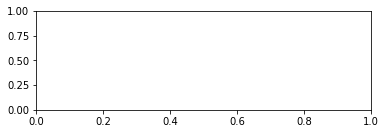

In [16]:
fig =plt.figure(15)

ax1 = plt.subplot(211)

for i in new_df:
    ax1.plot(xnew, new_df[i], 'b', linewidth =0.5, alpha = 0.2)
    
    
ax1.set_ylim((-10,500))
#ax1.set_ylimit(-0.1, 100)
#ax1.set_xlim((1200000,1300000))


mean_freq_change = new_df.mean(axis=1)
ax1.plot(xnew, mean_freq_change, 'b', linewidth =2.0)

ax1.axvspan(on_signal, off_signal, facecolor = 'r', edgecolor = 'none', alpha = 0.2)

'''
ax1.plot(times, crimson, 'r', linewidth =1.0)

ax2 = plt.subplot(212, sharex=ax1)
ax2.set_ylim(0, 20)
#ax2.set_xlim(20, 80)
#savitzky_golay
'''
'''freq_hat = savgol_filter(b2_frequencies, 7, 5) # window size 51, polynomial order 3'''
#freq_hat= b2_frequencies 
#ax2.plot(times_k, b2_frequencies,'k', linewidth = 0.75)
        
#for i in range(len(crimson_on)):
#    ax1.axvspan(times[crimson_on[i]], times[crimson_off[i]], facecolor = 'r', edgecolor = 'none', alpha = 0.3)
#    #ax2.axvspan(times[crimson_on[i]], times[crimson_off[i]], facecolor = 'r', edgecolor = 'none', alpha = 0.3)

In [ ]:
mean_freq_change = new_df.mean(axis=1)
freq_error = stats.sem(new_df,axis = 1)

In [ ]:
fig =plt.figure(16)


#wbf_means = wbf_means[0:len(wbf_means):10]
#wbf_error = stats.sem(all_wbf,axis = 0)
#wbf_error = wbf_error[0:len(wbf_error):10]

ax2 = fig.add_subplot(212)

ax2.set_ylim((-30,150))
#ax1.set_ylimit(-0.1, 100)
#ax2.set_xlim((1220000,1300000))
#ax2.set_xlim((1340000,1400000))

#ax2.axvspan(0.25, .75, facecolor = 'r', edgecolor = 'none', alpha = 0.3)
ax2.axvspan(on_signal, off_signal, facecolor = 'r', edgecolor = 'none', alpha = 0.2)
ax2.plot(xnew,mean_freq_change, 'b')
ax2.fill_between(xnew,mean_freq_change+freq_error, mean_freq_change-freq_error,color='k', alpha = 0.3, edgecolor = 'none')

ax2.set_title(r'$\mathrm{Activity\ of\ Power \ Muscle:}$', size=12, horizontalalignment='center',  y=1.08)#   \ \mu=100,\ \sigma=15$', size=12, horizontalalignment='center',  y=1.08) #verticalalignment='top')
ax2.set_ylabel('Frequency of Power Muscle Firing', size=10)
plt.xlabel('Time (s)', size=10) # $\phi$', size=10)
#ax2.title('B2 spike frequency')